In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#importing manager csv
female_manager = pd.read_csv('Data/female_manager.csv')
female_manager.head()

,country,country_code,new_code,latitude,longitude,indicator_name,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,Aruba,ABW,AW,12.52,-69.97,firms with female manager,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,AF,33.94,67.71,firms with female manager,0.0,0.0,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0
2,Angola,AGO,AO,-11.20,17.87,firms with female manager,0.0,13.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Albania,ALB,AL,41.15,20.17,firms with female manager,0.0,0.0,0.0,0.0,12.2,0.0,0.0,0.0,0.0,0.0,18.1
4,Andorra,AND,AD,42.55,1.60,firms with female manager,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#removing additional years
female_manager_2019=female_manager[["new_code", "year_2019"]]
female_manager_2019.head()

,new_code,year_2019
0,AW,0.0
1,AF,0.0
2,AO,0.0
3,AL,18.1
4,AD,0.0


In [4]:
#renaming 2019

female_manager_2019_final=female_manager_2019.rename(columns = {
    "year_2019" :"manager"
})
female_manager_2019_final.head()

,new_code,manager
0,AW,0.0
1,AF,0.0
2,AO,0.0
3,AL,18.1
4,AD,0.0


In [21]:
#importing parliament
female_labor = pd.read_csv('Data/labor_participation.csv')
female_labor.head()

,country,country_code,new_code,latitude,longitude,indicator_name,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019
0,Aruba,ABW,AW,12.52,-69.97,labor force participation rate,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Afghanistan,AFG,AF,33.94,67.71,labor force participation rate,14.94,14.94,15.34,15.85,16.76,17.74,18.76,19.84,20.97,21.42,21.59
2,Angola,AGO,AO,-11.20,17.87,labor force participation rate,75.70,75.77,75.85,75.91,75.97,76.02,76.07,76.11,76.13,76.14,76.14
3,Albania,ALB,AL,41.15,20.17,labor force participation rate,45.00,45.76,46.51,47.37,43.31,43.30,46.10,46.45,46.79,46.80,46.71
4,Andorra,AND,AD,42.55,1.60,labor force participation rate,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [22]:
#reducing columns
female_labor_2019=female_labor[["new_code", "year_2019"]]
female_labor_2019.head()

,new_code,year_2019
0,AW,0.00
1,AF,21.59
2,AO,76.14
3,AL,46.71
4,AD,0.00


In [23]:
#renaming 2019
female_labor_2019_final=female_labor_2019.rename(columns = {
    "year_2019" :"labor"
})
female_labor_2019_final.head()


,new_code,labor
0,AW,0.00
1,AF,21.59
2,AO,76.14
3,AL,46.71
4,AD,0.00


In [27]:
manager_regression=pd.merge(female_labor_2019_final, female_manager_2019_final, how='inner', on=["new_code", "new_code"])

In [28]:
manager_regression_final=manager_regression[(manager_regression["manager"]>0)]

In [29]:
X = manager_regression_final["labor"].values.reshape(-1, 1)
y = manager_regression_final["manager"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (33, 1) (33, 1)


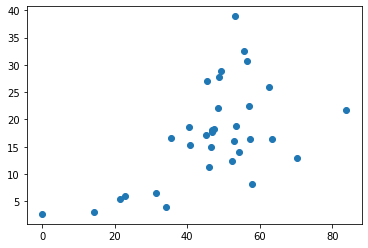

In [30]:
plt.scatter(X,y)

In [31]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [32]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.31515241]]
y-axis intercept:  [2.51902514]


In [34]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[83.93]]


In [35]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

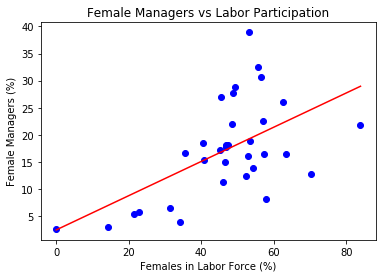

In [40]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
#plt.xlabel('your xlabel')
plt.ylabel('Female Managers (%)')
plt.xlabel('Females in Labor Force (%)')
plt.title('Female Managers vs Labor Participation')
plt.savefig('static/images/labor_manager_regression.svg')

In [20]:
#trying the above but removing counties with 0 for both
manager_regression2=manager_regression[(manager_regression["parliament"]>0)]
manager_regression_final=manager_regression2[(manager_regression2["manager"]>0)]
manager_regression_final

,new_code,parliament,manager
0,AL,29.51,18.1
8,AZ,16.81,16.5
18,BG,25.83,28.8
27,HR,20.53,27.0
29,CY,17.86,8.2
30,CZ,22.50,16.1
38,EE,29.70,22.5
42,GE,14.77,16.5
50,HU,12.56,22.1
57,IT,35.71,15.3


In [56]:
X = manager_regression_final["parliament"].values.reshape(-1, 1)
y = manager_regression_final["manager"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (29, 1) (29, 1)


In [57]:
from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

In [58]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.26428113]]
y-axis intercept:  [11.69299748]


In [60]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[4.6875]]
Max X Value: [[61.25]]


In [61]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5, 1.0, 'Female Managers')

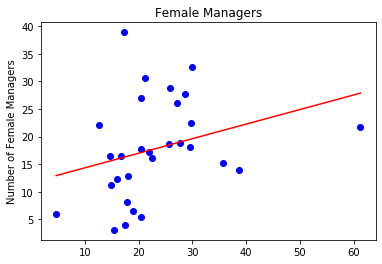

In [62]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
#plt.xlabel('your xlabel')
plt.ylabel('Number of Female Managers')
plt.title('Female Managers')